# **1. Perkenalan Dataset**


Dataset yang digunakan adalah dataset yang bersumber dari https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

In [3]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/daffaakifah/dataset-heart-disease/refs/heads/main/heart.csv')

In [4]:
# Melihat 5 data pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
print("\n===== Statistik Deskriptif =====")
print(df.describe())


===== Statistik Deskriptif =====
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.

In [8]:
print("\n===== Cek Missing Values =====")
print(df.isnull().sum())


===== Cek Missing Values =====
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
print("\n===== Cek Duplikat Data =====")
print(df.duplicated().sum())


===== Cek Duplikat Data =====
723


In [10]:
# Hapus duplikat data
df = df.drop_duplicates()
print("\nSetelah hapus duplikat:")
print(df.shape)


Setelah hapus duplikat:
(302, 14)



Visualisasi Univariat


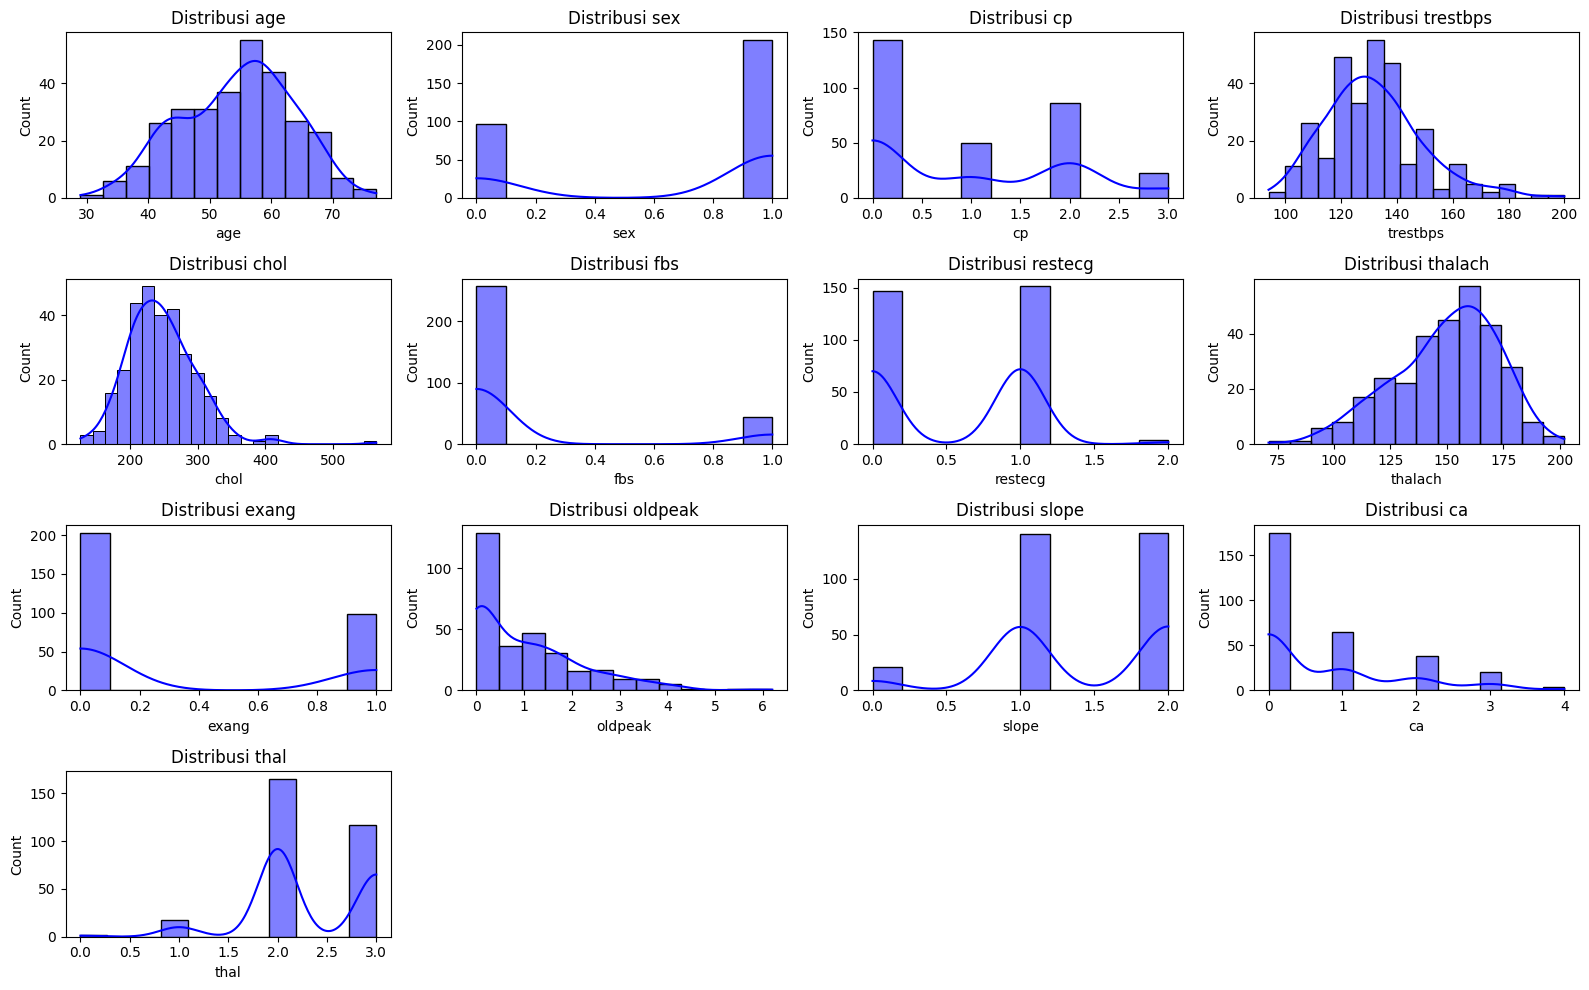

In [11]:
# Visualisasi Univariat
# ======================
print("\nVisualisasi Univariat")

plt.figure(figsize=(16,10))

for i, col in enumerate(df.columns.drop('target'), 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

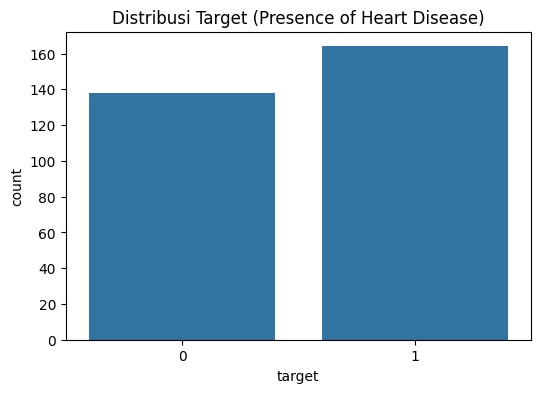

In [12]:
# Visualisasi distribusi target
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribusi Target (Presence of Heart Disease)')
plt.show()


Visualisasi Bivariat


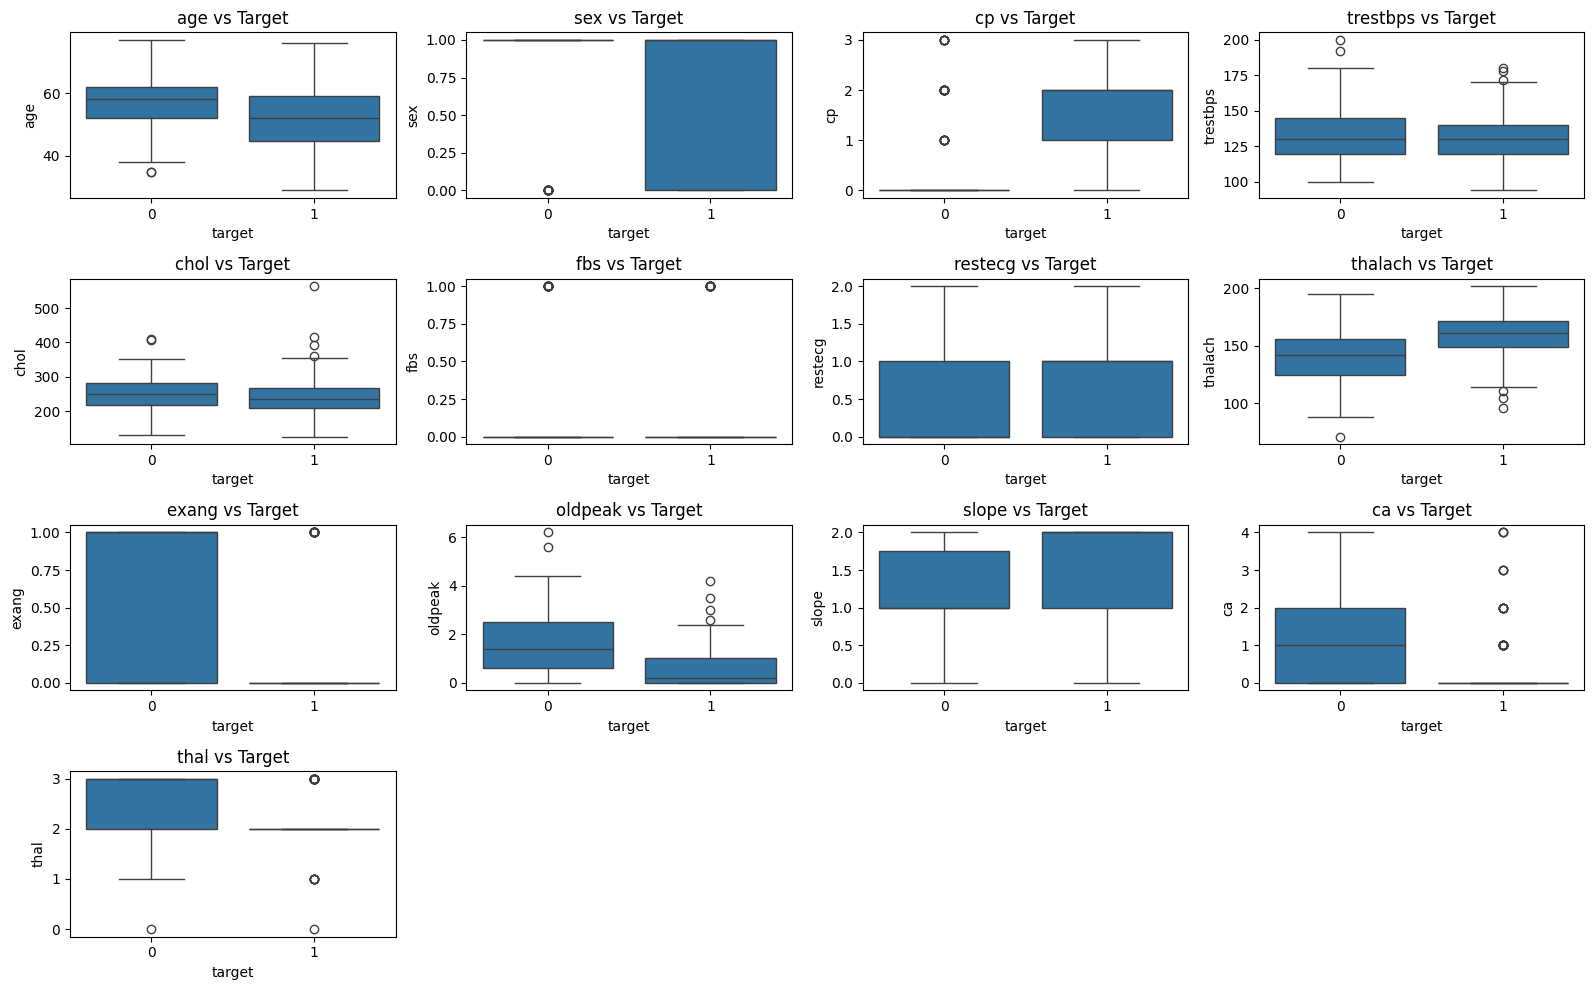

In [13]:
# Visualisasi Bivariat
# ======================
print("\nVisualisasi Bivariat")

# Boxplot tiap fitur vs target (karena target kategorikal 0/1)
plt.figure(figsize=(16,10))
for i, col in enumerate(df.columns.drop('target'), 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


Visualisasi Multivariat


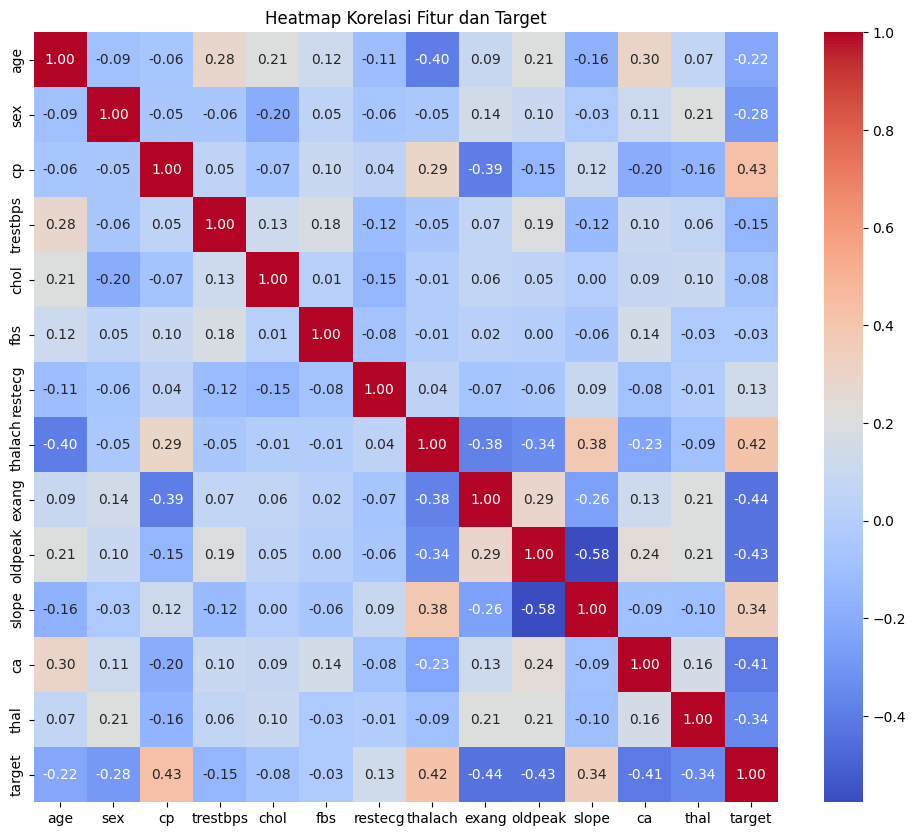

In [14]:
print("\nVisualisasi Multivariat")

# Heatmap korelasi antar fitur dan target
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur dan Target')
plt.show()

# **5. Data Preprocessing**

In [15]:
# Memisahkan kolom target
numeric_features = df.columns.drop('target')
X = df[numeric_features]
y = df['target']

In [16]:
# Menyiapkan preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [18]:
# Split data train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Fit transform pada train, transform pada test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [20]:
print(f"\nDimensi data setelah preprocessing:\nTrain: {X_train_prep.shape}\nTest: {X_test_prep.shape}")


Dimensi data setelah preprocessing:
Train: (241, 13)
Test: (61, 13)
